# Millennium Simulation Data Consistency Check: Overlaying Foreground galaxies on Ray-traced Shear and Convergence Maps

We must make sure that our galaxy/halo catalogs are read in correctly before we try and use them. In this demo we make plots of the ray-traced convergence and shear fields, and then overlay the associated foreground galaxies, sized by their stellar mass.

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import numpy as np
import scipy as sp
import os,sys
import astropy.io.fits as pyfits
import matplotlib.pyplot as plt
import cmath
%matplotlib inline

In [4]:
# Pangloss:
PANGLOSS_DIR = os.path.expandvars("$PANGLOSS_DIR")
sys.path.append(PANGLOSS_DIR)
import pangloss

In [5]:
K = pangloss.Kappamap(PANGLOSS_DIR+'/data/GGL_los_8_0_0_N_4096_ang_4_rays_to_plane_37_f.kappa',FITS=False)

In [6]:
S = pangloss.Shearmap([PANGLOSS_DIR+'/data/GGL_los_8_0_0_N_4096_ang_4_rays_to_plane_37_f.gamma_1',PANGLOSS_DIR+'/data/GGL_los_8_0_0_N_4096_ang_4_rays_to_plane_37_f.gamma_2'],FITS=False)

In [7]:
config = pangloss.Configuration(PANGLOSS_DIR+'/example/example.config')
F = pangloss.ForegroundCatalog(PANGLOSS_DIR+'/data/GGL_los_8_0_0_0_0_N_4096_ang_4_Guo_galaxies_on_plane_27_to_63.images.txt',config)

In [8]:
B = pangloss.BackgroundCatalog(sigma_e=0.5) # High ellipticity used to highlight the intrinsic shape of background sources

Now we have all the data we need, let's plot the maps and overlay the galaxies - first on the whole catalog, and then in a zoomed-in view.

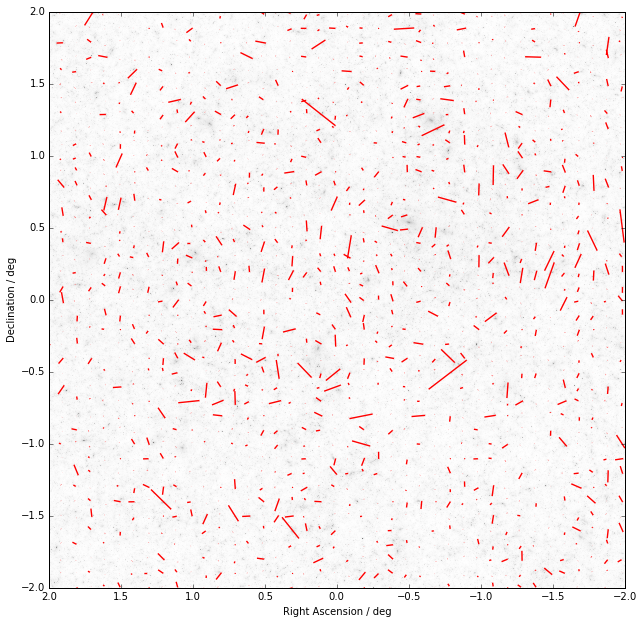

In [8]:
K.plot()
S.plot()

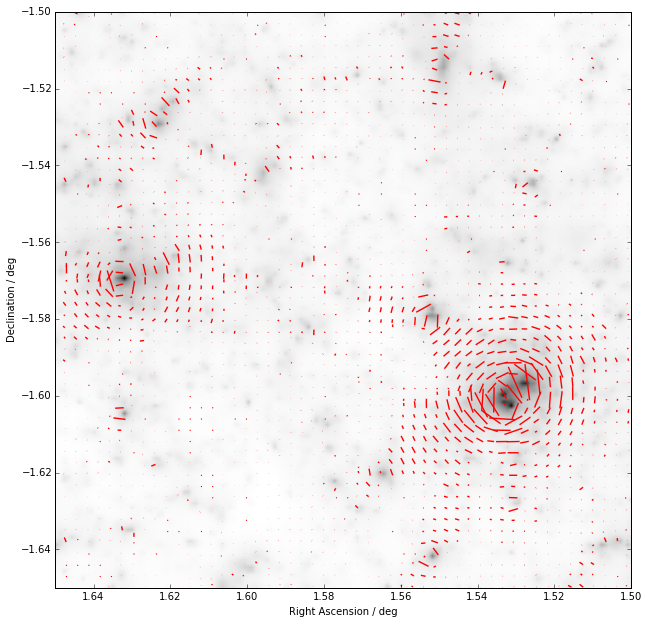

In [9]:
# Now works with subplots
K.plot(subplot=[1.65,1.5,-1.65,-1.5])
S.plot(subplot=[1.65,1.5,-1.65,-1.5])

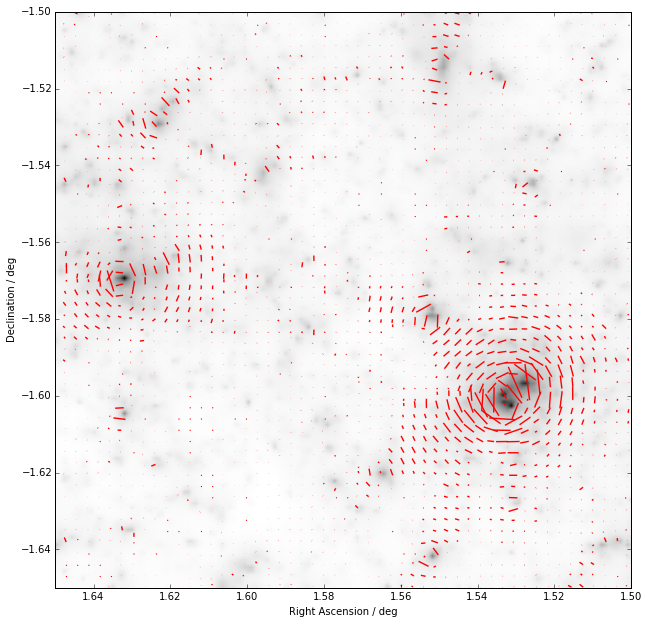

In [10]:
# The shearmap can also figure out the subplot from Kappamap if nothing is passed!
K.plot(subplot=[1.65,1.5,-1.65,-1.5])
S.plot()

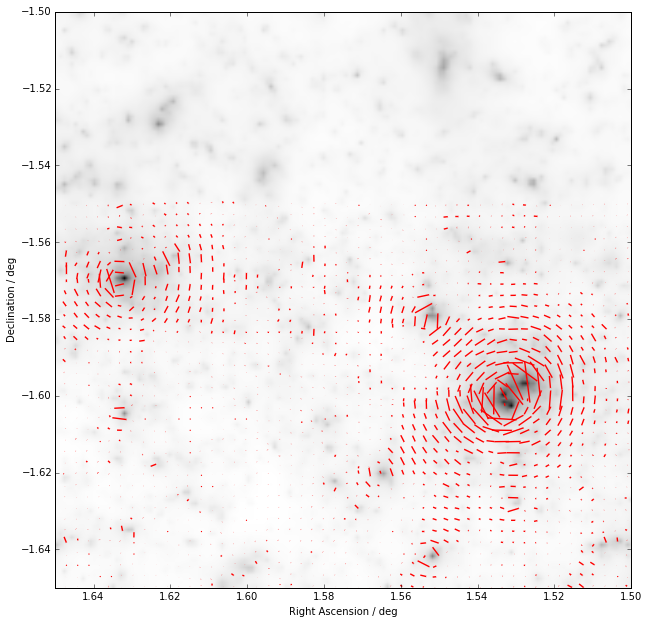

In [11]:
# If different subplots are passed, the Kappamap subplot is viewed and the overlapping shear sticks are plotted.
K.plot(subplot=[1.65,1.5,-1.65,-1.5])
S.plot(subplot=[1.65,1.5,-1.65,-1.55])

Now adding catalogs:

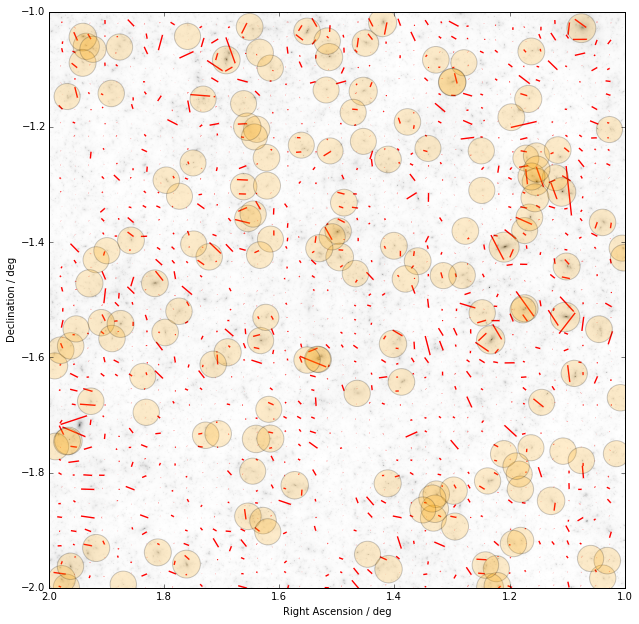

In [12]:
# Whole (0,0) field:
K.plot(subplot=[2,1,-2,-1])
S.plot()
F.plot(mass_lim=[10**11,10**12])

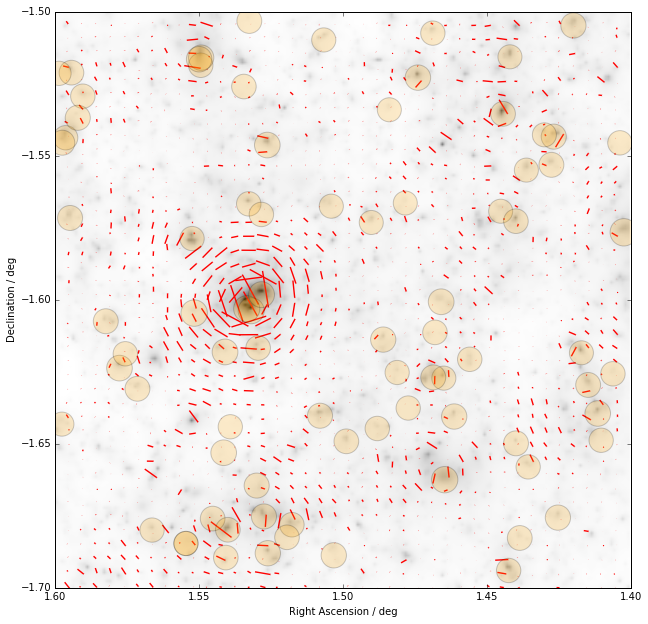

In [13]:
# Zoomed in:
K.plot(fig_size=10,subplot=[1.6,1.4,-1.7,-1.5])
S.plot()
F.plot(mass_lim=[10**10.7,10**12])

However, `ForegroundCatalog` instances can plot themselves without any maps:

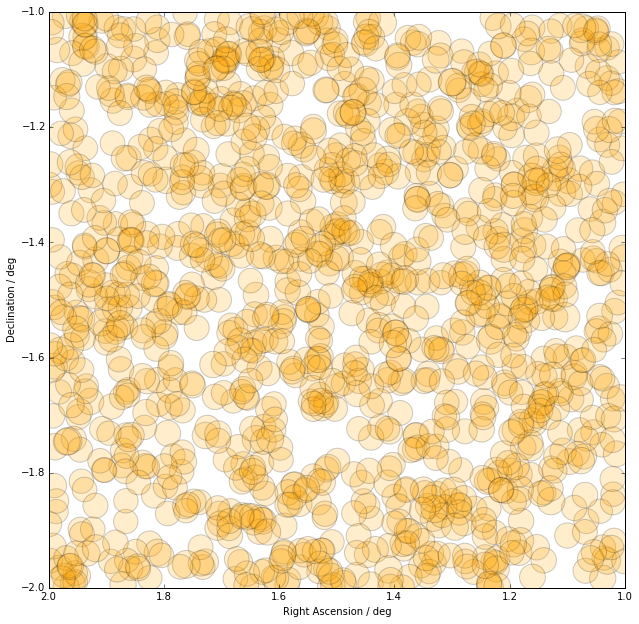

In [14]:
F.plot(mass_lim=[10**10.75,10**12])

We can also add a generated background catalog of galaxies to the overlays:

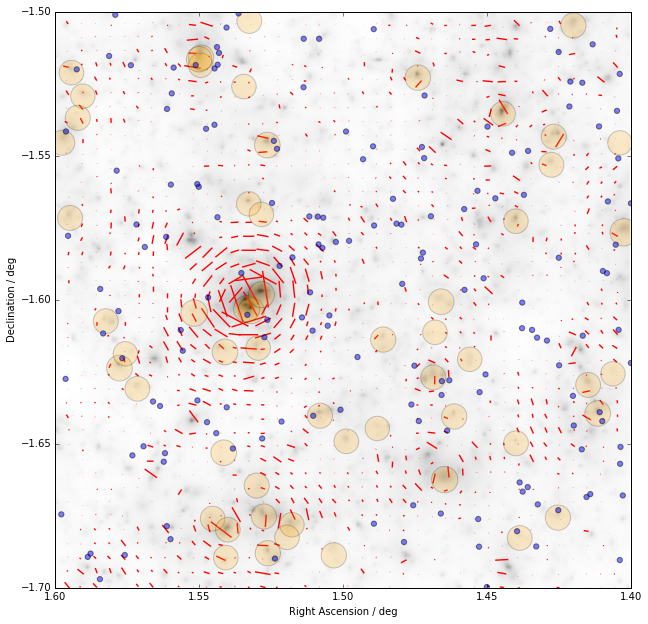

In [15]:
K.plot(fig_size=10,subplot=[1.6,1.4,-1.7,-1.5])
S.plot()
F.plot(mass_lim=[10**10.75,10**12])
B.plot(mass_lim=[10**11.95,10**12])

The background galaxies by default plot as points as there are so numerous (notice the very small mass range allowed in the previous plot). However, they can also be plotted as ellipses to show their intrinsic shape using the optional parameter `graph='ellipse'`. The foreground and background galaxies use the same mass scaling for plotting.

/home/spencer/Documents/Pangloss/pangloss/plotting.py:133: RuntimeWarning: invalid value encountered in sqrt
  ellipse = Ellipse(xy=[ra,dec],width=size,height=np.sqrt(q)*size,angle=phi)


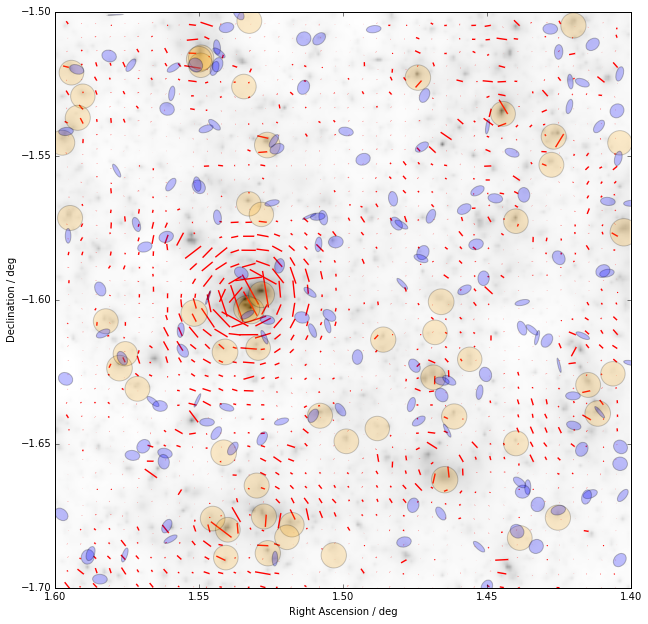

In [16]:
K.plot(fig_size=10,subplot=[1.6,1.4,-1.7,-1.5])
S.plot()
F.plot(mass_lim=[10**10.75,10**12])
B.plot(mass_lim=[10**11.95,10**12],graph='ellipse')

Sometimes it is more convenient to plot the background sources as ellipticity sticks. To do this, simply change the `graph` argument to `stick`. Each ellipticity stick is centered at the location of the source galaxy and has length proportional to the modulus of the ellipticity.

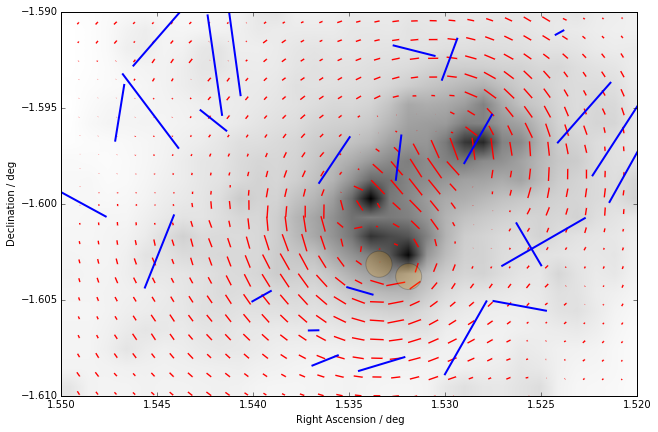

In [23]:
s =[1.55,1.52,-1.61,-1.59] # New, smaller subplot
B = pangloss.BackgroundCatalog(N=15,domain=s,sigma_e=0.1) # Using smaller ellipticities now
K.plot(subplot=s)
S.plot()
F.plot(mass_lim=[10**11,10**12])
B.plot(mass_lim=[10**11,10**12],graph='stick')

Like foreground catalogs, a background catalog can also plot itself when no maps are present.

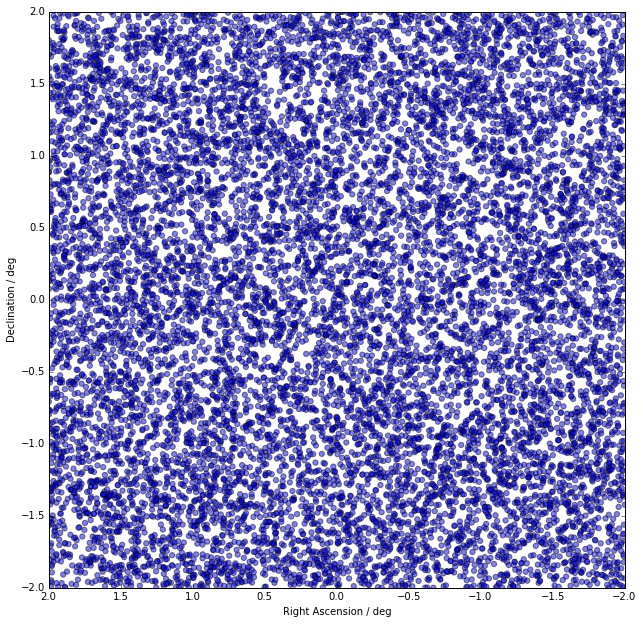

In [18]:
B.plot(mass_lim=[10**11.99,10**12])

(Add lensing and noise part!!)

In [25]:
B.lens_by_map(K,S)
B.add_noise()

## Scratch pad

## By-Hand Lensing Calculations

In [9]:
B = pangloss.BackgroundCatalog(N=25,domain=[1.55,1.52,-1.61,-1.59],sigma_e=0.01)
B.lens_by_map(K,S)

In [10]:
domain = [1.55,1.52,-1.61,-1.59]
galaxies = B.return_galaxies(ra_lim=[1.55,1.52],dec_lim=[-1.61,-1.59],mass_lim=[10**11,10**12])

i = 5
ra = np.rad2deg(galaxies['RA'][i])
print 'RA: ',ra
dec = np.rad2deg(galaxies['Dec'][i])
print 'Dec: ',dec
mass = galaxies['Mstar_obs'][i]
print 'mass: ',mass
mag = galaxies['mag'][i]
print 'mag: ',mag
eMod_int = galaxies['eMod_int'][i]
print 'eMod_int: ',eMod_int
eMod = galaxies['eMod'][i]
print 'eMod: ',eMod
ePhi_int = galaxies['ePhi_int'][i]
print 'ePhi_int: ',ePhi_int
ePhi = galaxies['ePhi'][i]
print 'ePhi: ',ePhi
e1_int = galaxies['e1_int'][i]
print 'e1_int: ',e1_int
e1 = galaxies['e1'][i]
print 'e1: ',e1
e2_int = galaxies['e2_int'][i]
print 'e2_int: ',e2_int
e2 = galaxies['e2'][i]
print 'e2: ',e2
kappa = K.at(ra,dec,mapfile=0)
print 'kappa: ',kappa
gamma1 = S.at(ra,dec,mapfile=0)
print 'gamma1: ',gamma1
gamma2 = S.at(ra,dec,mapfile=1)
print 'gamma2: ',gamma2

RA:  1.54175472124
Dec:  -1.59579979412
mass:  585147007613.0
mag:  23.914372071
eMod_int:  0.0227139563908
eMod:  0.104867387031
ePhi_int:  68.6248337484
ePhi:  54.7758587306
e1_int:  -0.0166792799794
e1:  -0.0350946669115
e2_int:  0.0154183473268
e2:  0.0988207124902
kappa:  0.048128680243
gamma1:  -0.0176865411249
gamma2:  0.0795016378574


"\n# Plotting ellipse/stick by hand\nscale = 0.5            \nfloor = 0.01\nsize = 0.01*(scale*(scale > 0) + floor)\n\nq = (1-eMod)/(1+eMod)\nellipse = Ellipse(xy=[1.533,-1.596],width=size,height=np.sqrt(q)*size,angle=30)\naxis = plt.gca()\naxis.add_artist(ellipse)      \nellipse.set_clip_box(axis.bbox)\nellipse.set_alpha(0.3)\nellipse.set_facecolor('purple')\n\npangloss.plotting.plot_sticks(1.533,-1.596,eMod,30,axis,'purple')\n"

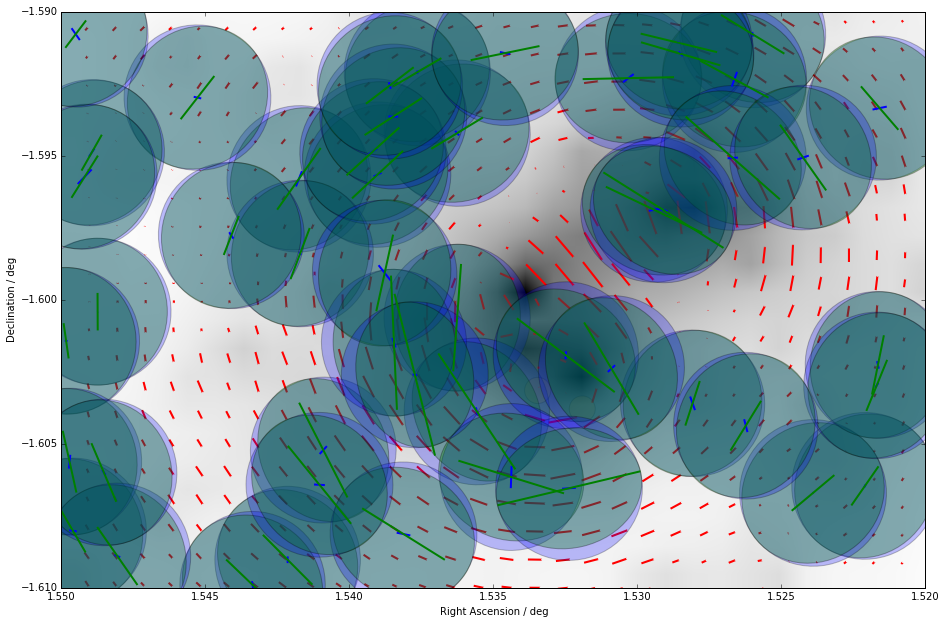

In [11]:

from matplotlib.patches import Ellipse

s =[1.55,1.52,-1.61,-1.59]
#s = [ra+0.05,ra-0.05,dec-0.05,dec+0.05]
K.plot(fig_size=15,subplot=s)
S.plot()
F.plot(mass_lim=[10**11,10**12])
B.plot(mass_lim=[10**11,10**12],graph='ellipse',lensed='both')
B.plot(mass_lim=[10**11,10**12],graph='stick',lensed='both')
#plt.scatter(ra,dec,color='green',s=200)
#print 'ePhi_int: ',ePhi_int,'ePhi: ',ePhi

'''
# Plotting ellipse/stick by hand
scale = 0.5            
floor = 0.01
size = 0.01*(scale*(scale > 0) + floor)

q = (1-eMod)/(1+eMod)
ellipse = Ellipse(xy=[1.533,-1.596],width=size,height=np.sqrt(q)*size,angle=30)
axis = plt.gca()
axis.add_artist(ellipse)      
ellipse.set_clip_box(axis.bbox)
ellipse.set_alpha(0.3)
ellipse.set_facecolor('purple')

pangloss.plotting.plot_sticks(1.533,-1.596,eMod,30,axis,'purple')
'''

"\n# Plotting ellipse/stick by hand\nscale = 0.5            \nfloor = 0.01\nsize = 0.01*(scale*(scale > 0) + floor)\n\naxis = plt.gca()\npangloss.plotting.plot_sticks(1.533,-1.596,eMod,30,axis,'purple')\n"

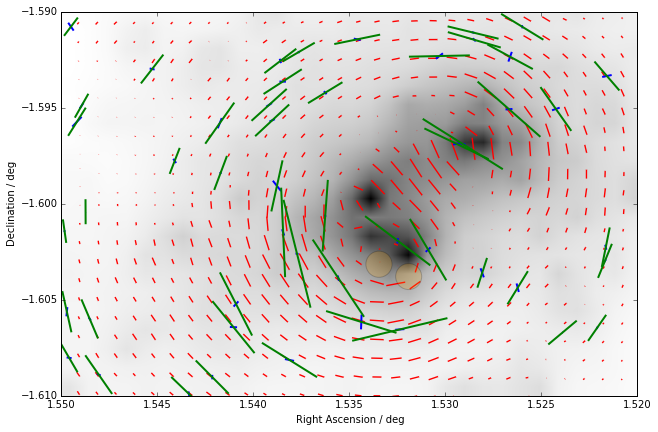

In [12]:

from matplotlib.patches import Ellipse

s = [1.55,1.52,-1.61,-1.59]
#s = [ra+0.05,ra-0.05,dec-0.05,dec+0.05]
K.plot(fig_size=10,subplot=s)
S.plot()
F.plot(mass_lim=[10**11,10**12])
#B.plot(mass_lim=[10**11,10**12],graph='ellipse',lensed='both')
B.plot(mass_lim=[10**11,10**12],graph='stick',lensed='both')
#plt.scatter(ra,dec,color='green',s=200)
'''
# Plotting ellipse/stick by hand
scale = 0.5            
floor = 0.01
size = 0.01*(scale*(scale > 0) + floor)

axis = plt.gca()
pangloss.plotting.plot_sticks(1.533,-1.596,eMod,30,axis,'purple')
'''